# Hirntumor-Segmentierung auf Basis von UNet.

## Ein kleiner Ausblick:
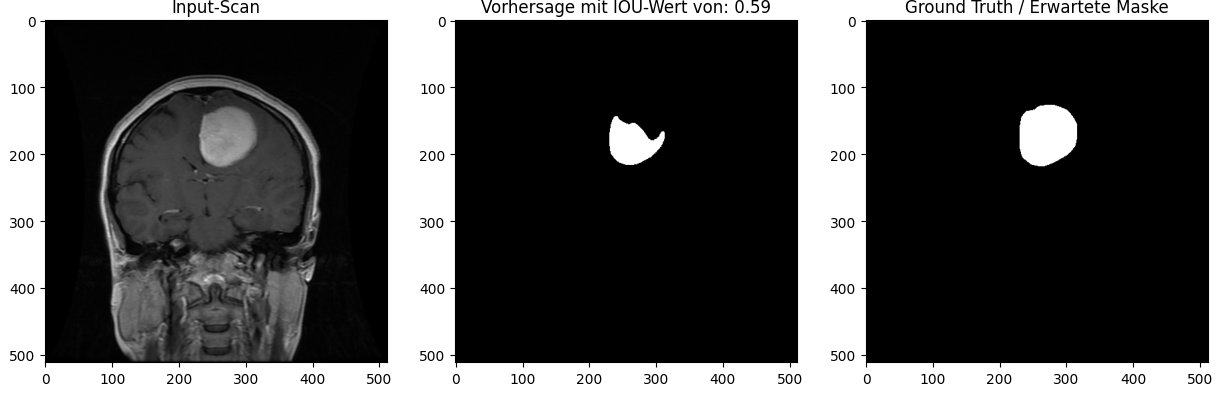
Abbildung 1: Eine Vorhersage des Modells zum Bild mit der ID 222. Eigene Darstellung

## Beschreibung und Ziel des Projekts
Ziel des Projekts ist die Verwendung der UNet-Architektur zur Segmentierung von MRI-Scans. Um dies zu bewerkstelligen wurde zunächst ein Datensatz auf der Plattform Kaggle rausgesucht, welcher Bildpaare von Scans und Masken beinhaltet, die es ermöglichen sollten die MRI-Scans der menschlichen Teilnehmer Pixel für Pixel der Kategorie / Klasse "Tumor" und "Nicht Tumor" zuzuordnen. Das Anwendungsgebiet solcher und ähnlicher Modelle wäre in der Medizin, spezieller in der Radiologie denkbar. Der Fokus dieses Projekts liegt auf der Anwendung der UNet-Architektur, um vorherzusagen, ob und wo auf einem Scan sich anomales Gewebe, in diesem Fall Tumorgewebe befindet. Um den Rahmen des Projekts sinvoll einzuschränken wird auf Variationen dieser Architektur oder potenziell andere Architekturbausteine, wenn nur in kurzer Form eingegangen. 
Für das Eingehen auf einen Programmablaufplan oder ein Klassendiagramm des Projekts eignet sich diese Art der Problemstellung eher weniger. Es werden keine eigenen Klassen erzeugt und nur eine Modellinstanz via Keras erzeugt. 

Ein abgewandelter Programmablaufplan, der nicht einzelne Codeanweisungen, sondern "das große Ganze" visualisiert, befindet sich in dem GitHub-Repository zu diesem Projekt.
## UNet-Architektur als Lösungsansatz
Die UNet-Architektur basiert Grundlegend auf der Funktionsweise des Convolutional Neural Networks (CNN) und wird einerseits durch den U-förmigen Aufbau der Architektur und durch die Popularität dieser Architektur in Vorhersage im Zusammenhang mit medizinischen Bildgebungsverfahren charakterisiert. (vgl. Lu et al. 2022).

Das Modell, welches in diesem Notebook in Tensorflow/Keras programmiert wurde ist im groben Aufbau sehr stark angelehnt an das origingale Unet von O. Ronnenberger et al. Es unterscheidet sich jedoch unter anderen in den Auflösungen, die die einzelnen Blöcke in jeder Schicht benutzen. Ebenfalls wurde die ReLU-Funktion als Aktivierungsfunktion genutzt. (vgl. Ronneberger et al. 2015)

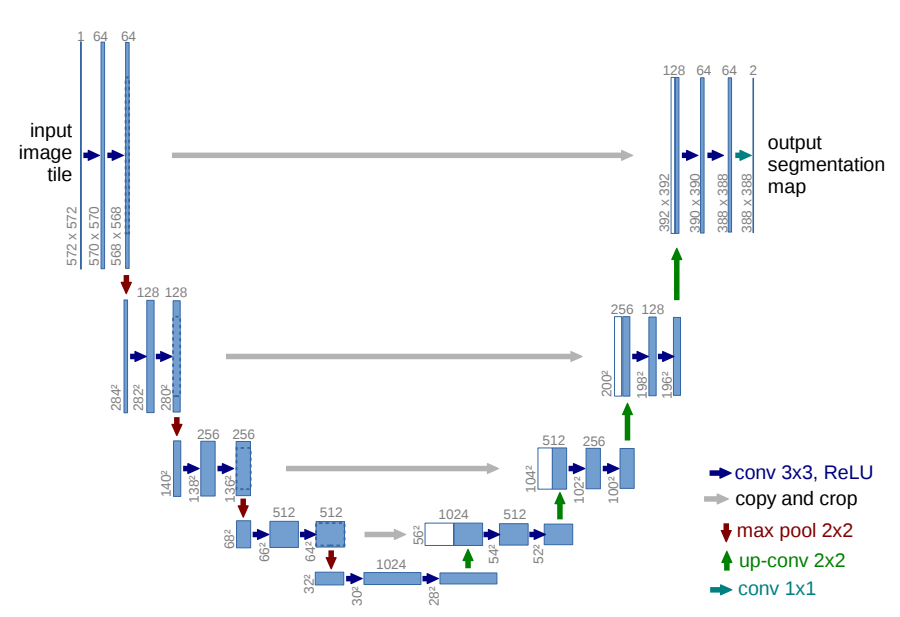
Abbildung 2: Originale UNet Architekur (Ronneberger et al. 2015)

## Datensatz
Der Datensatz, der für das Trainieren dieses UNet-Modells verwendet wurde ist das Brain Tumor Segmantation Dataset von Kaggle (https://www.kaggle.com/datasets/nikhilroxtomar/brain-tumor-segmentation), welches auf einem Datensatz von 3064 Paaren von MRI-Scans und ihren zugehörigen Masken basiert. (vgl. Cheng 2017). 
## Bewertung der Modellgüte
### Training Accuracy
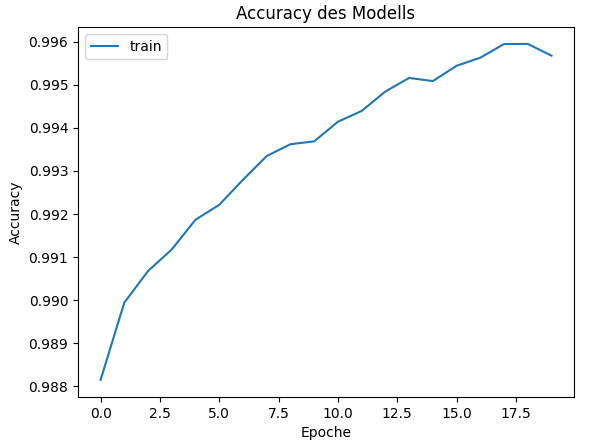
Abbildung 3: Nach 20 Epochen erreicht das Modell eine ugf. Accuracy von 0.995 im Training. Eigene Darstellung. 
### Hyperparamter und Evaluation
Um den Projektumfang einzugrenzen wird in diesem Fall nicht auf die Nutzung oder den Vergleich verschiedener Parameter zur Evaluation des Trainingsforschritts eingegangen. Für die Loss-Funktion wird während des Trainings die von Keras bereitgestellte Methode "Binary Cross-Entropy" (zu Deutsch: Binäre Kreuzentropie) verwendet.
## Einschränkungen und bekannte Probleme des Projekts
Im Folgenden würde ich gerne ein paar der Probleme erläutern, die mir während der Entwicklung und des Trainings dieses Modells auf Basis der UNet-Architektur aufgefallen sind
### Einschränkungen in den Trainingsdaten
Die Masken zu den Trainingsdaten, mit denen das Modell angepasst wurde, waren meiner Einschätzung nach teilweise nicht optimal gezeichnet oder zeigen wie im untenstehenden Beispiel keine direkte Maskierung des Tumors, sondern eher ein n-eckiges Polygon, welches dafür sorgt, dass die eher organische Form einer solchen Masse zu grob umrissen wird. Ein genaueres Polygon könnte die Trainingsergebnisse wahrscheinlich verbessern und würde das Modell realitätstauglicher machen, was hier jedoch nicht das Ziel des Projekts ist.
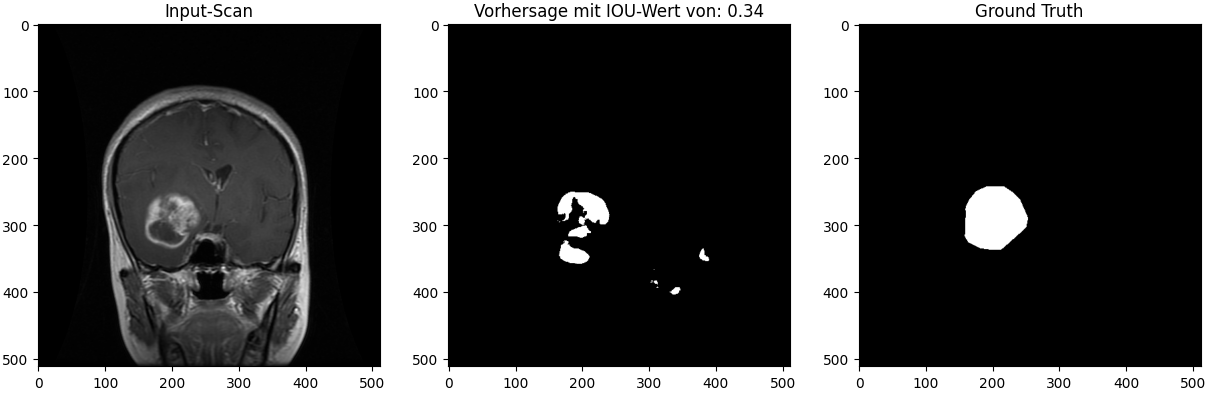
Abbildung 4: Vergleich der Vorhersage mit der vorgegebenen Maske des Datensatzes. Eigene Darstellung.
### Falsche Klassifizierungen
Die folgende Abbildung zeigt eine der Probleme des Modells auf. Da dieses Modell recht unverändert die Original-UNet-Architektur übernimmt und das Modell nur wenig Trainingsepochen durchlaufen hat, ist anzunehmen, dass falsche und/oder fehlende Klassifizierungen mit fortschreitendem Training oder einer Verbesserung des Modell-Ansatzes weniger häufig auftreten könnten.
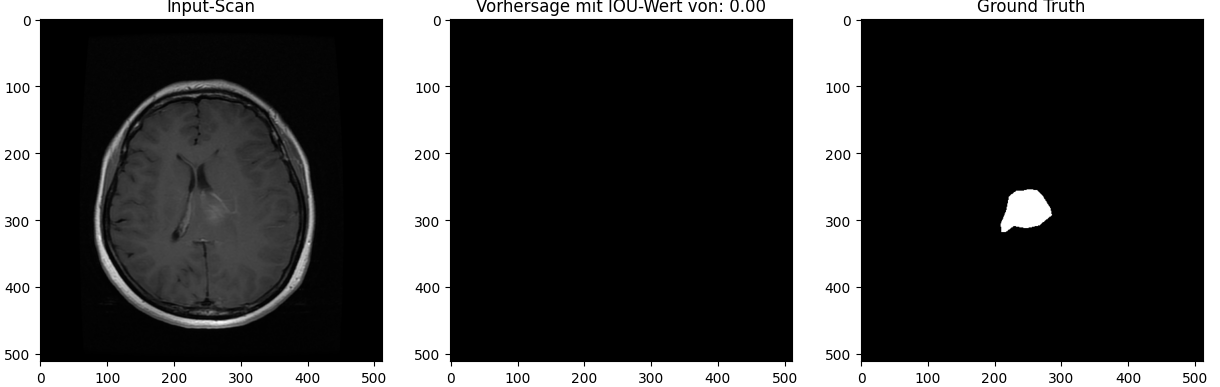
Abbildung 5: Die Tumormasse wird vom Modell nicht erkannt, da die als Tumor klassifizierten Pixel entweder als reguläres Gewebe wahrgenommen werden oder das Modell sich nicht "sicher" genug ist, dass ein Pixel zum Tumor gehört. Eigene Darstellung.
### Syntaxfehler
Im vorletzten Codeblock wird nach dem erstmaligen Trainierens des Modells des öfteren eine Fehlermeldung ausgeworfen. Indem man die folgenden Zeilen wieder entkommentiert; beide Zellen ausführt; und dann beide Codezeilen wieder auskommentiert kann man mit den letzten beiden Code-Zellen Vorhersagen für eine beliebige ImageID durchführen. Die exakten Schritt, um den Fehler zu behandeln sind aktuell noch unbekannt.

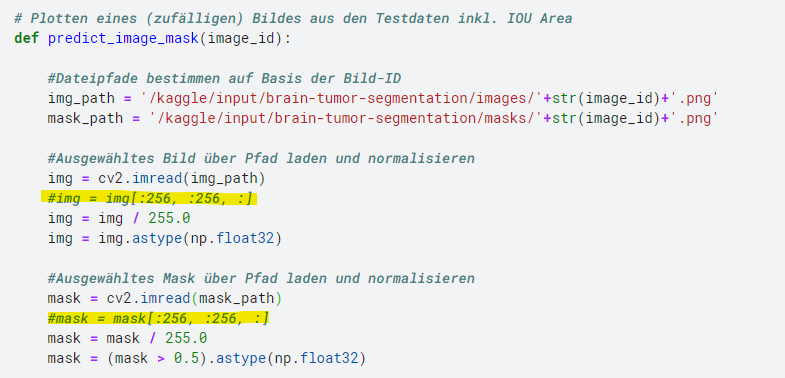
Abbildung 6: Zeilen, die bei Fehlermeldung im letzten Block entkommentiert werden müssten. Eigene Anfertigung

### Performance-Einschränkungen
#### Geringe Epochenanzahl
Das Training wurde jeweils nach 20 Epochen beendet. Wenngleich eine höhere Epochenzahl einen größeren Trainingserfolg ermöglichen könnte, hätte die Entwicklung mit häufigen Durchlaufversuchen vor allem bei Fehlerkorrekturen um einiges länger gedauert und würde die Zeit von der Anpassung bis zur Ausführung des Notebooks um einiges verlängern. Durch Abbruch des Trainings nach 20 Epochen, konnte eine Accuracy von ~0.99 erreicht werden.
#### Inputbilder und RAM-Limitierungen
Die volle Bildgröße von 512x512 Pixeln konnte nicht benutzt werden, da die Kaggle-Notebook-Umgebung nur 30gb Ram zur Verfügung hatte und das UNet diese in der aktuellen Version vollständig ausreizen würde. Die Abwägung zwischen zwei Entscheidungsoptionen: Skalieren der Bilder um den Faktor 2 von 512x512 auf 256x256 Pixel oder Bildausschnitte verwenden führte zur Entscheidung für die erstere Option, um dem Modell möglichst keine Informationen im Trainings über den Aufbau eines gesamten Querschnitts des menschlichen Schädels in MRI-Scans vorzuenthalten
## Ausblick
Basierend auf den vorangegangenen Informationen wäre es möglich konkrete Verbesserungsvorschläge für den Aufbau und das Training des Modells zu entwickeln. So wäre eine Möglichkeit die Nutzung von einem anderen Datensatz mit Bild-Masken-Paaren, in denen die "Polygone", welche den Tumor einschließen feiner gezogen werden. Eine sofortige Verbesserung des Trainingsergebnisses könnte wahrscheinlich dadurch erreicht werden, dass die Anzahl der Trainingsepochen von 20 auf eine deutlich höhere Zahl wie 50 oder gar 100 angehoben wird, sobald häufig Anpassungen des Quellcodes nicht mehr notwendig sind oder mehr GPUs mit mehr Leistung für das Training zur Verfügung stehen. Zusätzlich könnte jeder einzelne Block und jede Schicht im UNet angepasst werden, um potenziell bessere Ergebnisse zu erzielen. So könnten z.B. mehr oder weniger Convolution-Operationen durchgeführt werden. Um genauere Ergebnisse zu erhalten könnte man auch die bereits vorhandenen Daten augmentieren. Dies bedeutet, dass es möglich wäre ein größeren Datensatz durch Spiegelung, Drehung, Verschiebung etc. der Bilder zu erhalten. 
## Literaturverzeichnis
- Cheng, Jun (2017): brain tumor dataset, https://doi.org/10.6084/m9.figshare.1512427.v5. Aufgerufen am 18.12.2024
- How does the U-NET architecture leverage skip connections to enhance the precision and detail of semantic segmentation outputs, and why are these connections important for backpropagation? (2024): EITCA, https://eitca.org/artificial-intelligence/eitc-ai-adl-advanced-deep-learning/advanced-computer-vision/advanced-models-for-computer-vision/examination-review-advanced-models-for-computer-vision/how-does-the-u-net-architecture-leverage-skip-connections-to-enhance-the-precision-and-detail-of-semantic-segmentation-outputs-and-why-are-these-connections-important-for-backpropagation/#:~:text=Preservation%20of%20Spatial%20Information%3A%20As,feature%20maps%20from%20the%20encoder, Aufgerufen am 20.12.2024
- Lu, Haoran/She, Yifei/Tie, Jun/Xu, Shengzhou (2022): Half-UNet: A Simplified U-Net Architecture for Medical Image Segmentation, https://pmc.ncbi.nlm.nih.gov/articles/PMC9218935/#:~:text=Among%20them%2C%20U-Net%20is,feature%20maps%20from%20the%20encoder, Aufgerufen am 19.12.2024
- Ronneberger Olaf/Fischer Philipp/Brox Thomas (2015): U-Net: Convolutional Networks for Biomedical Image Segmentation, https://arxiv.org/pdf/1505.04597, Aufgerufen am 14.12.2024
- Keras (o.D.): Image segmentation metrics, https://keras.io/api/metrics/segmentation_metrics/. Aufgerufen am 18.12.2024
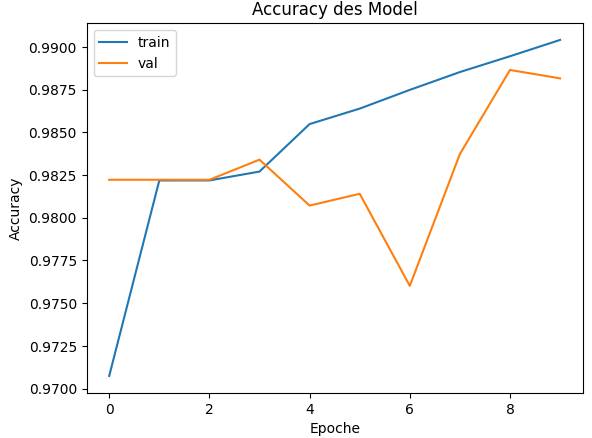
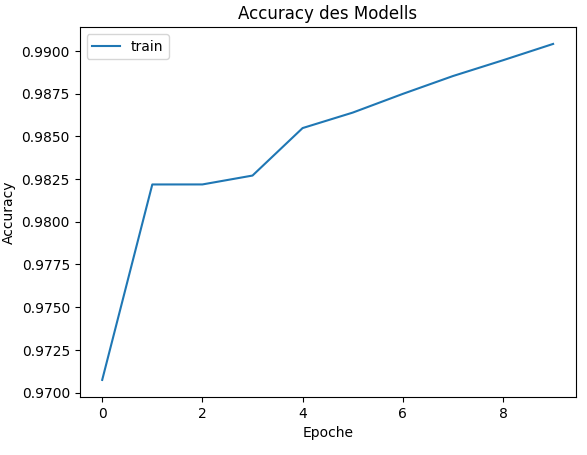
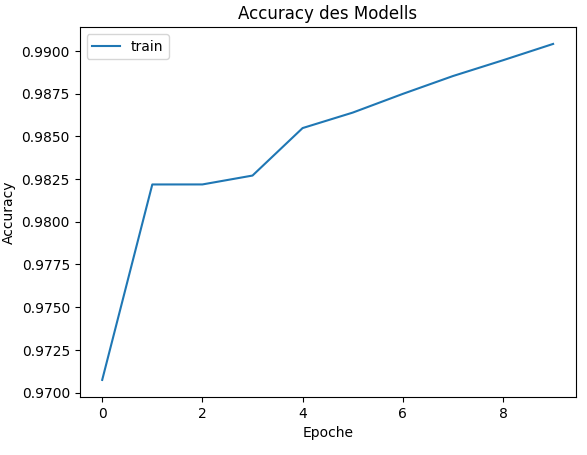

## Importieren von Libraries
Das Modell auf Basis der UNet-Architektur, was in diesem Notebook erzeugt wurde macht sich die Eigenschaften und Klassen der Keras Model-Klasse zu Nutze, die eine einfache Verkettung von den unterschiedlichen Schichten des UNets und die einfache Anwendung einer Loss-Funktion ermöglicht 

In [1]:
# Tensorflow, Keras und scikitlearn für den Bau und das Trainings des Modells
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Conv2DTranspose,concatenate,MaxPooling2D,Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import keras.backend as Kback

# Bildverarbeitung (skalierung, konvertierung, Interpolation etc.)
import cv2

# Plotting von Graphen
import matplotlib.pyplot as plt

# Versch. Imports
import shutil
import os
import numpy as np

### Laden der Bilder und Masken aus dem Datensatz


In [2]:
# Train-/Test-Bilder sind 256x256px mit 3 Farbebenen (Bilder von 512px auf 256px skaliert, da sonst Probleme mit RAM-Limitierung)
IMG_WIDTH=256
IMG_HEIGHT=256
IMG_CHANNELS=3

# dirs für die beiden Ordner des Datensatzes
DIR_SCANS = '/kaggle/input/brain-tumor-segmentation/images'
DIR_MASKS = '/kaggle/input/brain-tumor-segmentation/masks'

# Referenz auf Pfad der Bilder/Masken
scans=os.listdir(DIR_SCANS)
masks=os.listdir(DIR_MASKS)

# Zwei Felder X, Y erzeugen, die Masken und Bilder als Array beinhalten
X = np.zeros((len(scans),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS), dtype=np.float32)
y = np.zeros((len(masks), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.float32)

## Daten / Masken anpassen und auf Train-Test-Split aufteilen

In [3]:
# Normalisierung des Bildes, Konvertierung der Bilder und One-Hot-Encoding für die Masks
for scan in scans:
    n=scans.index(scan)
    path1=os.path.join('/kaggle/input/brain-tumor-segmentation/images',scan)

    # Trainingsbild mit cv2 einlesen, in den korrekten Farbraum konvertieren und dann auf 256x256 runterskalieren mit kubischer Bildinterpolation
    img=cv2.imread(path1)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(256,256), interpolation=cv2.INTER_CUBIC)

    # Einlesen der Masken, die Grayscale-Werte von 0-255 beinhalten 
    # und jeden Pixel dieser Maske mit One-Hot-Encoding dem Hintergrund oder der Tumor-Klase zuordnern
    # Außerdem die Bilder normalisieren auf einen Farbraum von 0.0-1.0
    try:
        X[n]=img/255
        mask=masks[n]
        path2=os.path.join('/kaggle/input/brain-tumor-segmentation/masks',mask)
        mask=cv2.imread(path2,cv2.IMREAD_GRAYSCALE)
        mask=cv2.resize(mask,(256,256), interpolation=cv2.INTER_CUBIC)
        mask = tf.one_hot(mask, 1, dtype=tf.int32)
        y[n] = mask
    except Exception as e:
        print(e)

# Train-Test-Split der Daten erzeugen mit 20% der Daten im Teststplit 
# und random_state für Reproduziertbarkeit durch Nutzung eines gleichbleibenden Seeds
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

## Aufbau des Modells mit einem sich zusammenziehenden und einem expandierenden Pfad

In [4]:
# 256x256 Bilder mit 3-Farbkanälen (ursprünglich 512,512,3)
inputs=tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))


s = inputs

# Zusammenziehender Pfad (linke Seite des UNets)

# Exemplarische Beschreibung eines Convolution-Block des UNets:
# Nutzung der He-Normalisierung sowie der ReLU-Aktivierungsfunktion (anstatt bspw. Leaky ReLU oder Sigmoid)
# Verwendung von Same-Padding, um die größe der Inputmatrix beizubehalten (alternativ: valid-padding), 
# da sonst die Conv2D Operation dazu führen würde, dass die Ausgangsmatrix kleiner als die Eingangsmatrix werden würde 
# -> gleiche Größe beibehalten
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.2)(c1)  
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)


c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.2)(c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     

c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = Dropout(0.3)(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
# Concatenate ermöglich die sogenannten Skip-Connections, welche Informationen aus dem UNet ohne runterskalierung durch 
# verschiedenen Convolutions von den Blöcken der linken Hälfte des UNets in die Blöcke der rechten Hälfte einschleusen. 
# Skip connections sind dafür gedacht, den Verlust von Informationen bzw. Details aus den höheren Schichten zu mitigieren 
# und das als sog. "Vanishing Gradients Problem" bekannte Problem umgehen kann. 
# (vgl. How does the U-NET architecture leverage skip connections to enhance the precision and detail of semantic segmentation outputs, and why are these connections important for backpropagation? 2024)  
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

#Expandierender Pfad (rechte Seite des UNets)
u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.2)(c8)  # Original 0.1
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.2)(c9)  # Original 0.1
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
  
# Outputs normalisiert zwischen 0 und 1 durch Sigmoid-Aktivierungsfunktion      
outputs = Conv2D(1,(1, 1),activation='sigmoid')(c9)

# Model erzeugen und Zusammenfassung zu Parametern und Schichten des Modells mittels .summary() ausgeben lassen
model = Model(inputs=[inputs], outputs=[outputs])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]  

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

## Trainings des Modells

In [46]:
# Optimierung mit Adam; Model auf Datensatz 'fitten' und für 20 Epochen auf den Trainingsdaten trainieren 
# Nutzung der Binary Crossentropy Funktion als Loss-Funktion, da geeignet für die binäre Klassifikation (hier: Tumor / kein Tumor)
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss='binary_crossentropy', 
              metrics=['binary_accuracy'],)

history=model.fit(X_train, 
                  y_train,validation_data = (X_test,y_test),
                  epochs=20,)

Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 54s 472ms/step - binary_accuracy: 0.9868 - loss: 0.0410 - val_binary_accuracy: 0.9882 - val_loss: 0.0368
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 287ms/step - binary_accuracy: 0.9898 - loss: 0.0281 - val_binary_accuracy: 0.9880 - val_loss: 0.0370
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 23s 294ms/step - binary_accuracy: 0.9909 - loss: 0.0252 - val_binary_accuracy: 0.9900 - val_loss: 0.0285
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - binary_accuracy: 0.9912 - loss: 0.0238 - val_binary_accuracy: 0.9879 - val_loss: 0.0372
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 281ms/step - binary_accuracy: 0.9917 - loss: 0.0231 - val_binary_accuracy: 0.9904 - val_loss: 0.0263
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - binary_accuracy: 0.9922 - loss: 0.0209 - val_binary_accuracy: 0.9910 - val_loss: 0.0243
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 287ms/step - binary_accuracy: 0.9929 - loss: 0.0190 - val_binary_accuracy: 0.9911 - val_loss: 0.0235

## Plotting der Trainingsresultate

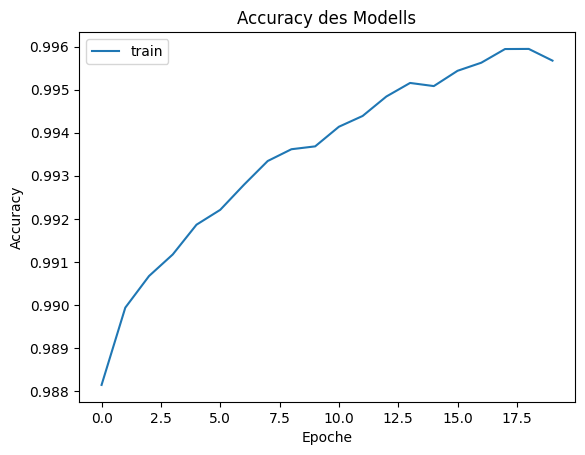

In [51]:
# Plotten des Trainings-Fortschritts mit Beginn bei der 0. Epoche (n-1. Epoche ist die letzte Epoche -> bei 10 Epochen ist die 9. die letzte)
# Ausgabe als einfacher Plot über Pyplot mit zwei Achsen und Labels
def plot_training():
    plt.plot(history.history['binary_accuracy'])
    plt.title('Accuracy des Modells')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoche')
    plt.legend(['train'], loc='upper left')
    plt.show()

plot_training()

## Vorhersage des Modells für ein Bild

In [56]:
# Plotten eines (zufälligen) Bildes aus den Testdaten inkl. IOU Area
def predict_image_mask(image_id):

    #Dateipfade bestimmen auf Basis der Bild-ID
    img_path = '/kaggle/input/brain-tumor-segmentation/images/'+str(image_id)+'.png'
    mask_path = '/kaggle/input/brain-tumor-segmentation/masks/'+str(image_id)+'.png'
    
    #Ausgewähltes Bild über Pfad laden und normalisieren
    img = cv2.imread(img_path)
    #img = img[:256, :256, :]
    img = img / 255.0
    img = img.astype(np.float32)

    #Ausgewähltes Mask über Pfad laden und normalisieren
    mask = cv2.imread(mask_path)
    #mask = mask[:256, :256, :]
    mask = mask / 255.0
    mask = (mask > 0.5).astype(np.float32)

    ## Vorhersage zum Bild hinter img_path
    pred_mask = model.predict(np.expand_dims(img, axis=0))[0]
    # Binäre Vorhersagemaske erzugen (der Modell-Output muss sich zu über 75% "sicher sein", 
    # dass es sich um einen Pixel handelt, der zum Tumor gehört)
    pred_mask = (pred_mask < 0.25).astype(np.float32)  
    
    # IOU-Wert (Intersection over Union Wert) berechnen
    inter = np.logical_and(mask, pred_mask)
    union = np.logical_or(mask, pred_mask)

    #berechnung von iou als Kriterium, um die Überlappung und Korrektheit der vorhergesagten Klassen für die Menge der Pixel zu bestimmen (vgl. Keras o.D.)
    iou = np.sum(inter) / np.sum(union) if np.sum(union) > 0 else 0
    print(np.sum(union))

    return img, pred_mask, mask, iou
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
21408


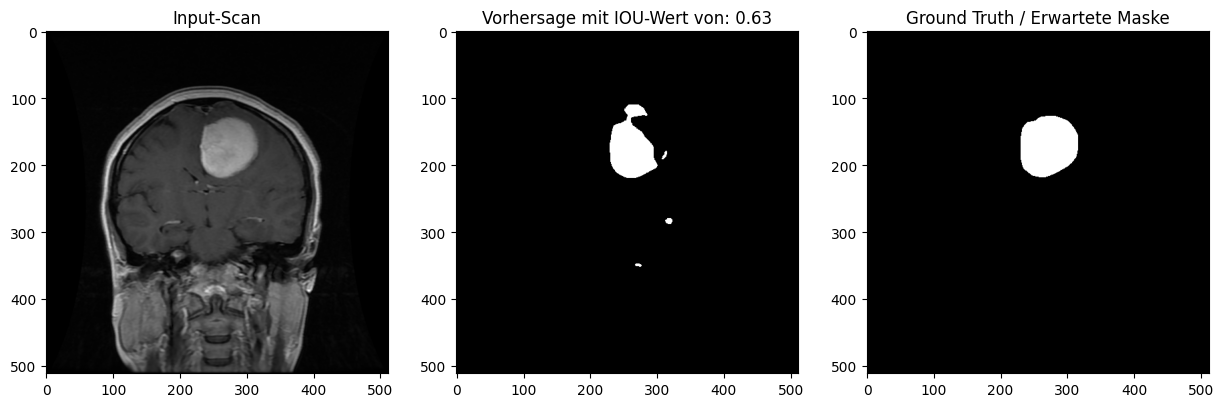

In [57]:
img, pred_mask, ground_truth, iou = predict_image_mask(222)

# Erzeugung eines Plots mit Pyplot, der 3 einzelne Graphen beinhaltet, um den Input, die Vorhersage und die Maske darzustellen 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15, 10))

ax1.set_title("Input-Scan")
ax1.imshow(img)

ax2.set_title("Vorhersage mit IOU-Wert von: %.2f"%(iou))
ax2.imshow(pred_mask, cmap='gray')

ax3.set_title("Ground Truth / Erwartete Maske")
ax3.imshow(ground_truth, cmap='gray')

plt.show()